#### PRIMERA SECCIÓN 
Trabajando con listas y diccionarios

#### PREGUNTA 1 (2 puntos)
Usando "list comprehension", escribe un programa que tenga como inputs una lista y el resultado sea otra lista pero solo de los número que sean divisibles entre 3

#### PREGUNTA 2 (2 puntos)

Escribe una funcion que halle el numero más grande de una lista

### SEGUNDA SECCIÓN
Analisis de datos con pandas

In [2]:
import pandas as pd
%matplotlib inline

#### PREGUNTA 1

In [3]:
raw_data = {'regimiento': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'compania': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'muertes': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'batallas': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'tamaño': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veteranos': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'desertores': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origen': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}
df_army = pd.DataFrame(raw_data, columns = ['regimiento', 'compania', 'muertes', 'batallas', 'tamaño', 'veteranos', 'readiness', 'armored', 'desertores', 'origen'])

Con el dataframe df_army realiza las siguientes acciones (5 puntos)
- Selecciona las columnas "muertes" y tamaño que tenga como origen Maine y Alaska
- Selecciona las filas donde las muertes sean mayores que 500 o menores que 50
- Crea una nueva columna con un ratio que represente el promedio de muertes por batalla

In [5]:
df_army[(df_army['origen']=='Maine')|(df_army['origen']=='Alaska')][['muertes','tamaño']]

,muertes,tamaño
4,43,1592
6,523,987


In [6]:
df_army[(df_army['muertes']>500)|(df_army['muertes']<50)]

,regimiento,compania,muertes,batallas,tamaño,veteranos,readiness,armored,desertores,origen
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
10,Scouts,2nd,37,8,1099,63,2,1,2,Louisana
11,Scouts,2nd,35,9,1523,345,3,1,3,Georgia


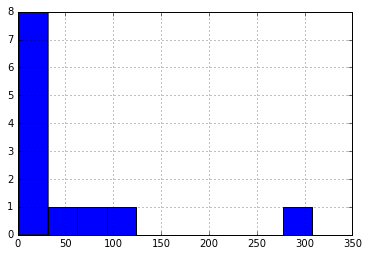

In [7]:
df_army['ratio'] = df_army['muertes'] / df_army['batallas']
df_army['ratio'].hist()

#### PREGUNTA 2

Carga las base de datos llamada: "US_Baby_Names_right.csv" en un dataframe (5 puntos)
- ¿Existen más hombres o mujeres en la base de datos?
- ¿Cual es el nombre que tiene más ocurrencias?
- ¿En que año existen más personas?

In [8]:
df_baby = pd.read_csv('D:\\cgamero\\ISIL\\aplicaciones_analiticas_isil\\Examen Parcial\\data\\US_Baby_Names_right.csv')

In [9]:
df_baby.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [12]:
print len(df_baby[df_baby['Gender']=='F'])
print len(df_baby[df_baby['Gender']=='M'])
print "Existen mas mujeres"

558846
457549
Existen mas mujeres


In [15]:
df_baby.groupby('Name')['Count'].sum().sort_values(ascending=False)

Name
Jacob          242874
Emma           214852
Michael        214405
Ethan          209277
Isabella       204798
William        197894
Joshua         191551
Sophia         191446
Daniel         191440
Emily          190318
Olivia         188036
Alexander      187189
Matthew        185279
Noah           179925
Anthony        179256
Andrew         174975
Christopher    172997
Joseph         169972
David          167606
Ava            167369
Madison        166959
Jayden         166864
James          162429
Logan          158186
Ryan           156507
Abigail        156236
Mason          149221
Benjamin       145867
Aiden          145774
Elijah         142851
                ...  
Sadiee              5
Miqueas             5
Arna                5
Miquela             5
Tianah              5
Cicely              5
Armine              5
Mirai               5
Sadler              5
Thi                 5
Christoph           5
Chukwuebuka         5
Min                 5
Minah               5
Lochl

In [16]:
df_baby.groupby('Year')['Count'].sum().sort_values(ascending=False)

Year
2007    3412417
2006    3387737
2008    3340318
2005    3305315
2004    3293984
2009    3232116
2010    3116548
2014    3113611
2011    3079145
2012    3073858
2013    3066443
Name: Count, dtype: int64

#### PREGUNTA 3

Carga el archivo imdb_1000.csv en un dataframe de pandas y contesta las siguientes preguntas (6 puntos)
- ¿Cuantas peliculas tiene un ranking de más de 8 estrellas?
- ¿De que géneros son las películas con un ranking más de 9 estrellas?
- ¿Cuales son las dos películas de horror y de clasificación "R" que tienen más estrellas?

BONUS (4 puntos)
- ¿Existe alguna relación entre la duración de una película y las estrellas de rating que posee?
- ¿Cuales son los dos actores que tienen más prescencia en las peliculas en general?

In [17]:
df_imdb = pd.read_csv('D:\\cgamero\\ISIL\\aplicaciones_analiticas_isil\\Examen Parcial\\data\\imdb_1000.csv')

In [22]:
df_imdb['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [18]:
df_imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [19]:
len(df_imdb[df_imdb['star_rating']>8])

297

In [21]:
df_imdb[df_imdb['star_rating']>9]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [28]:
df_imdb[df_imdb['genre']=='Horror'].sort_values(['star_rating'], ascending = [False])

,star_rating,title,content_rating,genre,duration,actors_list
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
57,8.5,Alien,R,Horror,117,"[u'Sigourney Weaver', u'Tom Skerritt', u'John ..."
62,8.5,The Shining,R,Horror,146,"[u'Jack Nicholson', u'Shelley Duvall', u'Danny..."
161,8.2,Diabolique,UNRATED,Horror,116,"[u'Simone Signoret', u'V\xe9ra Clouzot', u'Pau..."
186,8.2,The Thing,R,Horror,109,"[u'Kurt Russell', u'Wilford Brimley', u'Keith ..."
317,8.0,Dawn of the Dead,UNRATED,Horror,127,"[u'David Emge', u'Ken Foree', u'Scott H. Reini..."
322,8.0,The Exorcist,R,Horror,122,"[u'Ellen Burstyn', u'Max von Sydow', u'Linda B..."
330,8.0,Nosferatu,UNRATED,Horror,81,"[u'Max Schreck', u'Greta Schr\xf6der', u'Ruth ..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
353,8.0,Night of the Living Dead,UNRATED,Horror,96,"[u'Duane Jones', u""Judith O'Dea"", u'Karl Hardm..."
